# Forming Backtesting Framework

### From Black and Scholes Option Pricing Formulae

$$C = S \cdot N(d_1) - K \cdot e^{-r \cdot T} \cdot N(d_2)$$
$$P = K \cdot e^{-r \cdot T} \cdot N(-d_2) - S \cdot N(-d_1)$$

$$d_1 = \frac{\ln{(\frac{S}{K})}+(r+\frac{\sigma^2}{2}) \cdot T}{\sigma \cdot \sqrt{T}}$$
$$d_2 = d_1 - \sigma \cdot \sqrt{T}$$

With $S$ as the asset price, $K$ as the strike price, $r$ as the market riskless rate, $T$ as the maturation period, and $\sigma$ as the asset volatility

Because Black and Scholes derivation of this formula models $\sigma$ as constant, rather than stochastic, using the mean (expected value) of the volatility in a stochastic framework to value the option produces a biased price for the option. Rather than this, we use the expected value of the option, given the stochastic framework, and can produce a value for implied volatility using this. This also means we cannot just compare the volatility across the maturation period provided from the models to the historical realized volatility to backtest them.

To backtest models, we will:
1. Find the expected value of options of the same maturation period and similar moneyness forecasted by the model using monte-carlo simulation
2. Compare the residuals of these expected values to the realized values of options over a timeline
3. Present these residuals for the models for different maturation periods and moneyness

# 0. Import Modules

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from models import ARCHForecastModel, ARIMAForecastModel, ARIMAARCHForecastModel, HistoricVolModel
from backtester import Backtest

/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/py_lets_be_rational/numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


# 1 Performance Backtesting (AAPL)

In [9]:
perfs = []
models = []

## 1.1 GARCH(1,1) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6381.212991393228
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6932453616.153545
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2612.573594189799
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2299.8116462369617
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2248.2150089433476
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2248.1371121447073
Iteration:      7,   Func. Count:     46,   Neg. LLF: 2248.1363552219336
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2248.1363488973398
Iteration:      9,   Func. Count:     55,   Neg. LLF: 2248.1363488975785
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2248.1363488973398
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9


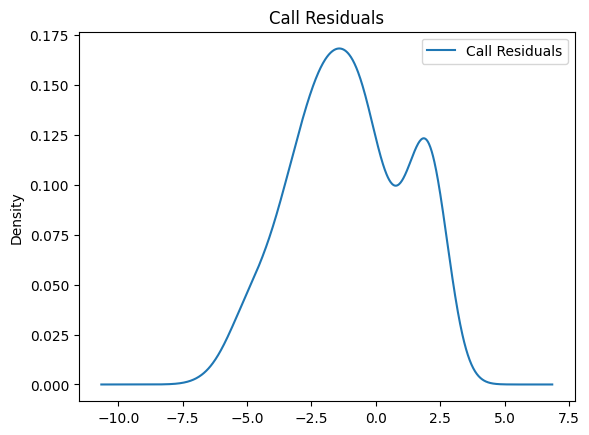

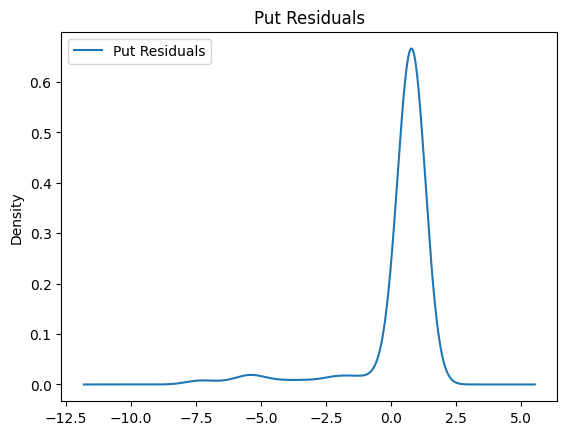

In [10]:
performances = Backtest.backtest(ARCHForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, ("GARCH",1,1), 1)
Backtest.present_performance("GARCH(1,1) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("GARCH(1,1)")

## 1.2 EGARCH(1,1) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 10224.880287004707
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2966614261156.0303
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4318305.341868157
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2469.145182091149
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2244.2955941587543
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2243.380968245025
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2243.3745433244558
Iteration:      8,   Func. Count:     55,   Neg. LLF: 2243.374329434857
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2243.37432320227
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2243.374323201757
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2243.37432320227
            Iterations: 10
     

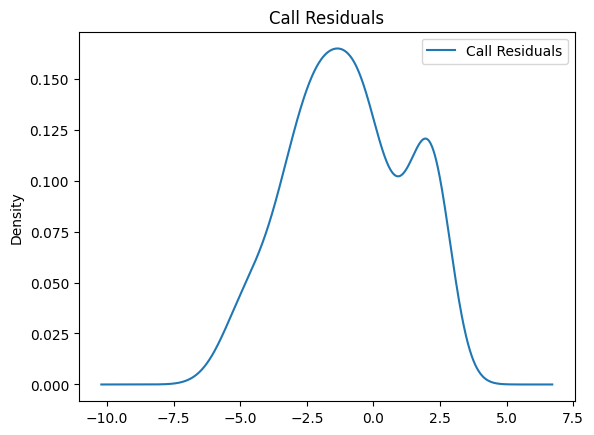

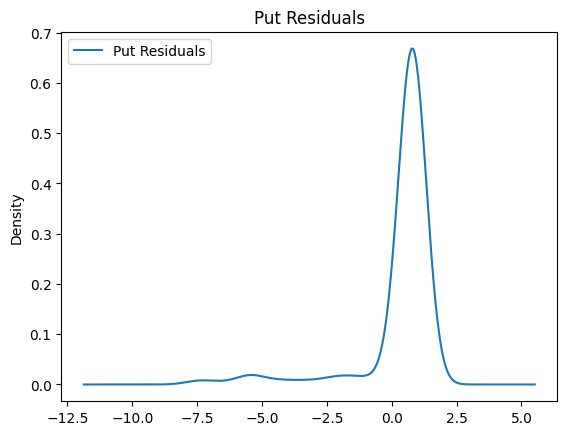

In [11]:
performances = Backtest.backtest(ARCHForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, ("EGARCH",1,1), 1)
Backtest.present_performance("EGARCH(1,1) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("EGARCH(1,1)")

## 1.3 GARCH(2,2) Performance

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      8,   Neg. LLF: 6425.049799431554
Iteration:      2,   Func. Count:     18,   Neg. LLF: 297464.2895414323
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2329.5002782723072
Iteration:      4,   Func. Count:     37,   Neg. LLF: 2299.096658130105
Iteration:      5,   Func. Count:     46,   Neg. LLF: 2257.132958397844
Iteration:      6,   Func. Count:     54,   Neg. LLF: 2248.624515086187
Iteration:      7,   Func. Count:     62,   Neg. LLF: 2251.0041988620396
Iteration:      8,   Func. Count:     70,   Neg. LLF: 2248.0278958668177
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2248.019280029658
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2248.019089985527
Iteration:     11,   Func. Count:     92,   Neg. LLF: 2248.0190693587583
Iteration:     12,   Func. Count:     99,   Neg. LLF: 2248.019065480604
Iteration:     13,   Func. Count:    105,   Neg. LLF: 2248.019

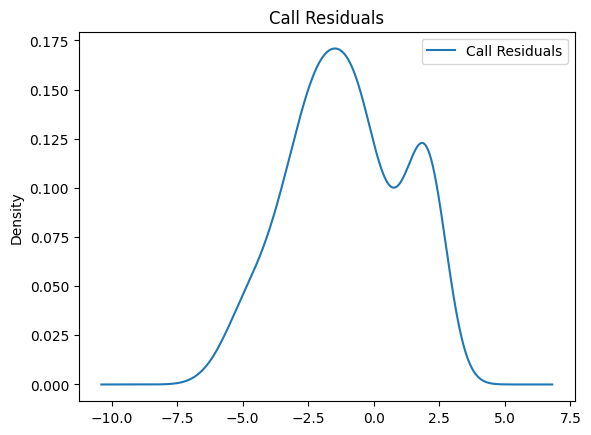

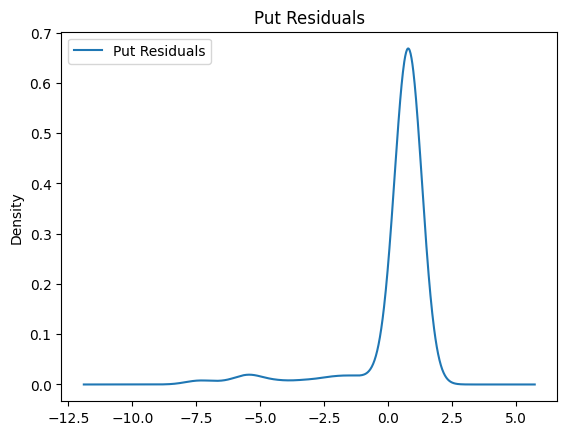

In [12]:
performances = Backtest.backtest(ARCHForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, ("GARCH",2,2), 1)
Backtest.present_performance("GARCH(2,2) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("GARCH(2,2)")

## 1.4 EGARCH(2,2) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Iteration:      1,   Func. Count:      8,   Neg. LLF: 204864719799.80792
Iteration:      2,   Func. Count:     18,   Neg. LLF: 116238243147.16591
Iteration:      3,   Func. Count:     29,   Neg. LLF: 73892342866.49753
Iteration:      4,   Func. Count:     40,   Neg. LLF: 29029406552.128082
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2419.4145798232457
Iteration:      6,   Func. Count:     59,   Neg. LLF: 2249.3206792307583
Iteration:      7,   Func. Count:     67,   Neg. LLF: 2243.5411469471646
Iteration:      8,   Func. Count:     75,   Neg. LLF: 2242.9212936438225
Iteration:      9,   Func. Count:     82,   Neg. LLF: 2242.90618892772
Iteration:     10,   Func. Count:     89,   Neg. LLF: 2242.895736105591
Iteration:     11,   Func. Count:     96,   Neg. LLF: 2242.836425937302
Iteration:     12,   Func. Count:    103,   Neg. LLF: 2242.82734921539
Iteration:     13,   Func. Count:    110,   Neg. LLF: 2242.8271368707383
Iteration:     14,   Func. Count:    117,   Neg. LLF: 224

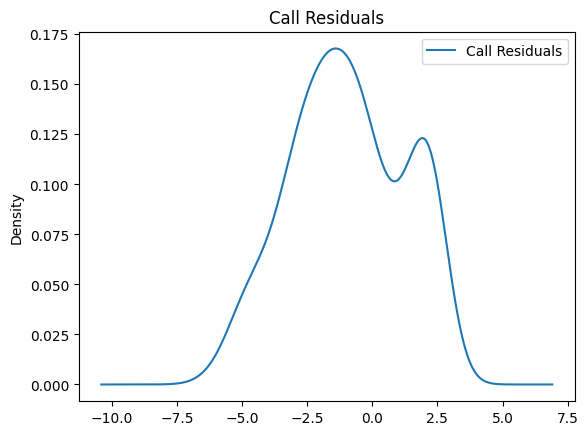

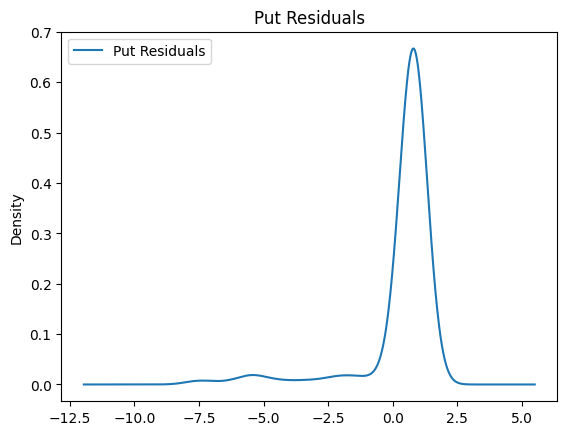

In [13]:
performances = Backtest.backtest(ARCHForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, ("EGARCH",2,2), 1)
Backtest.present_performance("EGARCH(2,2) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("EGARCH(2,2)")

## 1.5 ARIMA(2,0,2) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

For ARIMA(2,0,2) Model Trained from 2014 to 2019 tested on 2020,
mean training time was 1.5375289999999993 seconds,
              and mean pricing time was 258.836302 seconds,
              mean call residual was -3.186336964335477 with variance 4.848940769348281 and,
              mean put residual was -0.5062022215161273 with variance 2.4372951980058337
              


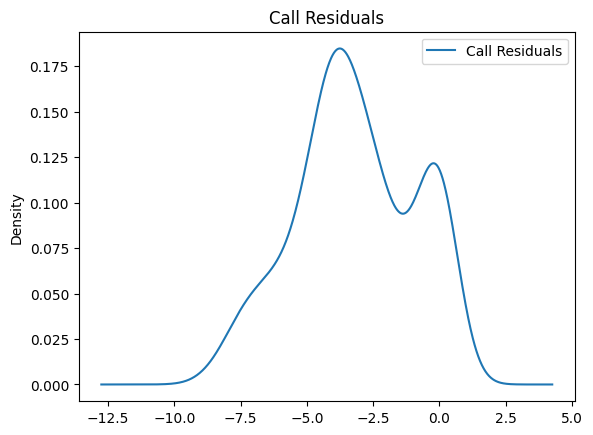

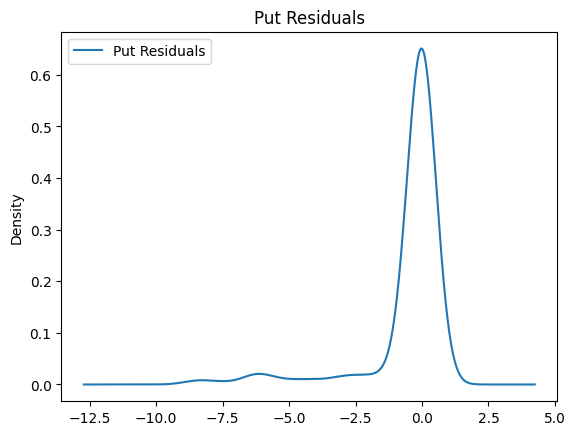

In [14]:
performances = Backtest.backtest(ARIMAForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, ((2,0,2),), 1)
Backtest.present_performance("ARIMA(2,0,2) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("ARIMA(2,0,2)")

## 1.6 SARIMA(2,0,2,4) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tayo4pf/Libra

For SARIMA(2,0,2,4) Model Trained from 2014 to 2019 tested on 2020,
mean training time was 35.243719 seconds,
              and mean pricing time was 7127.5785590000005 seconds,
              mean call residual was -3.186339047872653 with variance 4.848944077239487 and,
              mean put residual was -0.5062035952347365 with variance 2.4372970457051126
              


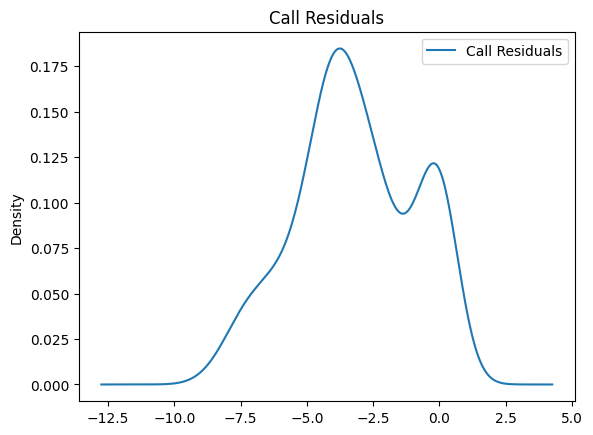

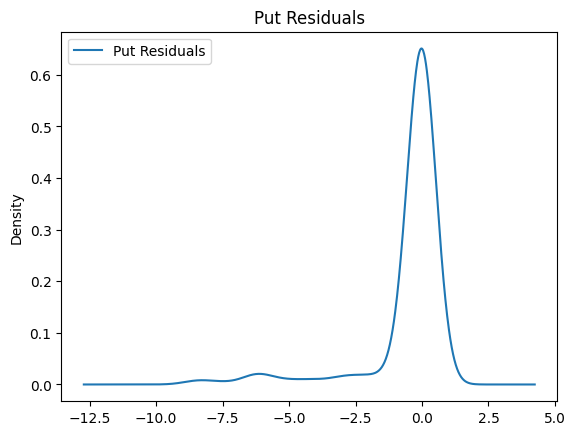

In [15]:
performances = Backtest.backtest(ARIMAForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, ((2,0,2),(2,0,2,4)), 1)
Backtest.present_performance("SARIMA(2,0,2,4) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("SARIMA(2,0,2,4)")

## 1.7 ARIMA(2,0,2)+GARCH(1,1) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Iteration:      1,   Func. Count:      5,   Neg. LLF: 3610.262157994768
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2518.0319493409716
Iteration:      3,   Func. Count:     19,   Neg. LLF: 2299.711472937025
Iteration:      4,   Func. Count:     25,   Neg. LLF: 2248.1864599739024
Iteration:      5,   Func. Count:     29,   Neg. LLF: 2248.179556912653
Iteration:      6,   Func. Count:     33,   Neg. LLF: 2248.1795342016458
Iteration:      7,   Func. Count:     36,   Neg. LLF: 2248.1795342008236
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2248.1795342016458
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7


/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/t

For ARIMA(2,0,2)+GARCH(1,1) Model Trained from 2014 to 2019 tested on 2020,
mean training time was 1.8704170000000886 seconds,
              and mean pricing time was 377.18787900000007 seconds,
              mean call residual was -1.9701646495427174 with variance 4.8267557736844795 and,
              mean put residual was 0.6285609761108749 with variance 2.4087324324640593
              


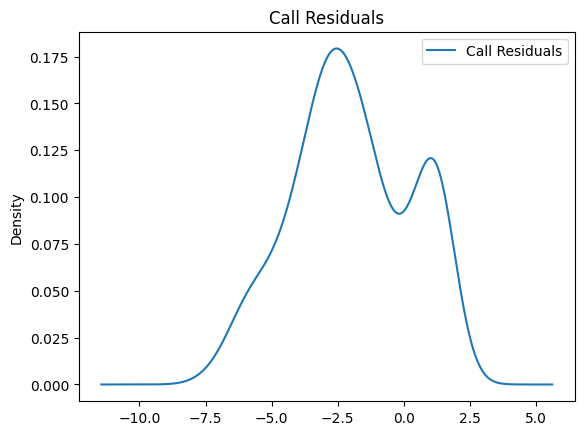

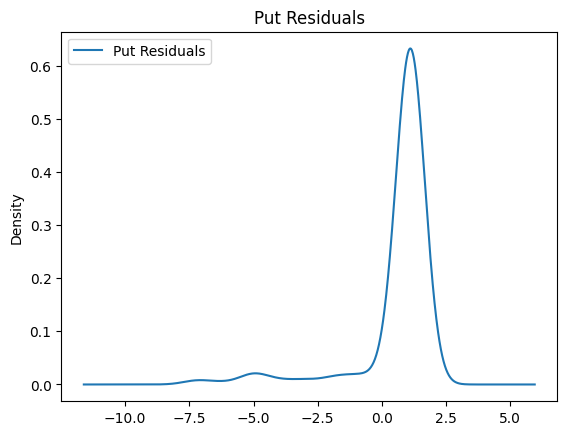

In [16]:
performances = Backtest.backtest(ARIMAARCHForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, (1,1,"GARCH",(2,0,2)), 1)
Backtest.present_performance("ARIMA(2,0,2)+GARCH(1,1) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("ARIMA(2,0,2)+GARCH(1,1)")

## 1.8 SARIMA(2,0,2,4)+GARCH(1,1) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tayo4pf/Libra

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3059.847640169574
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2552.44652435773
Iteration:      3,   Func. Count:     19,   Neg. LLF: 2300.11452516001
Iteration:      4,   Func. Count:     25,   Neg. LLF: 2245.5692817713834
Iteration:      5,   Func. Count:     29,   Neg. LLF: 2245.555988105738
Iteration:      6,   Func. Count:     33,   Neg. LLF: 2245.555943394149
Iteration:      7,   Func. Count:     36,   Neg. LLF: 2245.5559433936032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2245.555943394149
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7


/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/tayo4pf/Library/CloudStorage/OneDrive-UniversityofCambridge/part-ii-dissertation/arm_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

For SARIMA(2,0,2,4)+GARCH(1,1) Model Trained from 2014 to 2019 tested on 2020,
mean training time was 29.899343999999473 seconds,
              and mean pricing time was 6160.506182 seconds,
              mean call residual was -1.9657771347185207 with variance 4.843435613966318 and,
              mean put residual was 0.6137396914701069 with variance 2.411655480806784
              


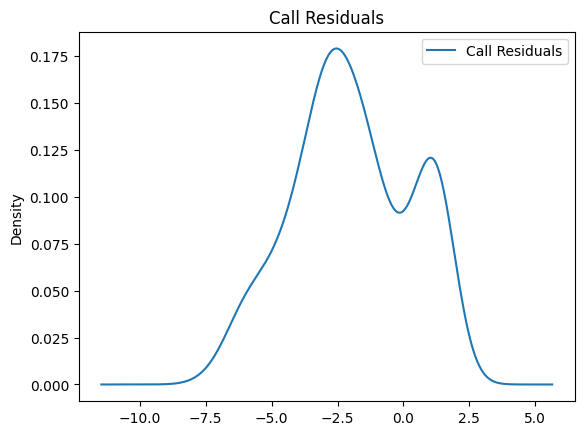

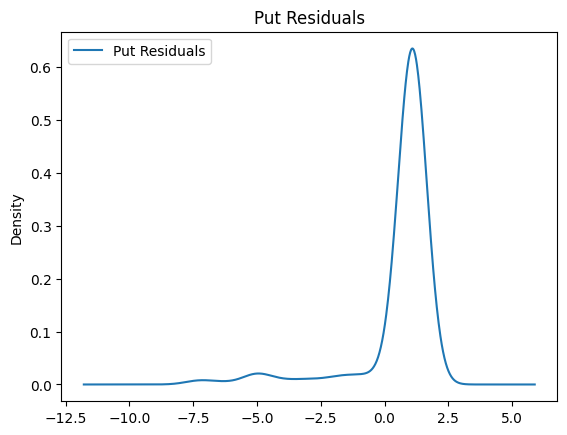

In [17]:
performances = Backtest.backtest(ARIMAARCHForecastModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, (1,1,"GARCH",(2,0,2),(2,0,2,4)), 1)
Backtest.present_performance("SARIMA(2,0,2,4)+GARCH(1,1) Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("SARIMA(2,0,2,4)+GARCH(1,1)")

## 1.9 Historical(100, 100) Performance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


For Historic(100,100) Vol Model Trained from 2014 to 2019 tested on 2020,
mean training time was 0.05072399999880872 seconds,
              and mean pricing time was 0.3565309999994497 seconds,
              mean call residual was -0.7929169719926217 with variance 6.143219024247908 and,
              mean put residual was 0.9438815875040809 with variance 3.443765495427741
              


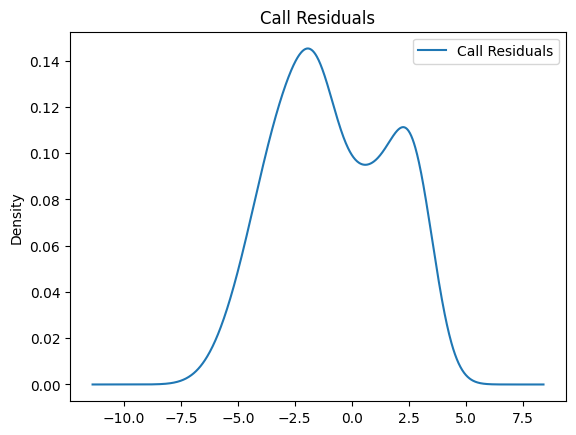

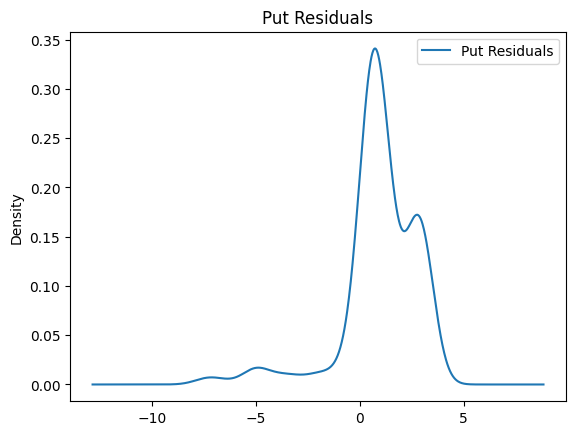

In [18]:
performances = Backtest.backtest(HistoricVolModel, "AAPL", "2014-01-01", "2020-01-01", "2019-01-01", 21, 1, (100,100), 1)
Backtest.present_performance("Historic(100,100) Vol Model Trained from 2014 to 2019 tested on 2020", performances)
perfs.append(performances)
models.append("Hist(100,100)")

# 2 Comparing Performances (AAPL)

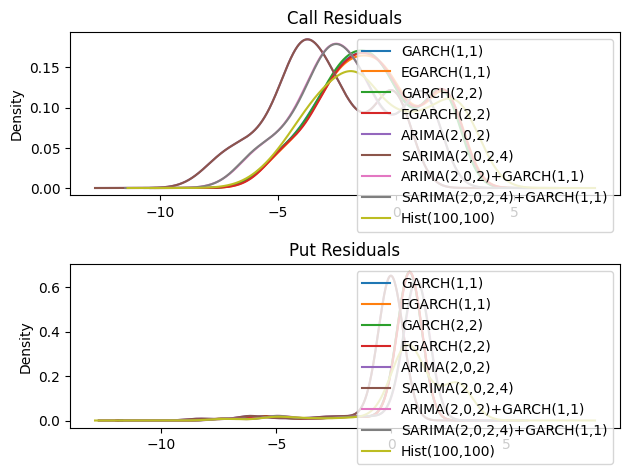

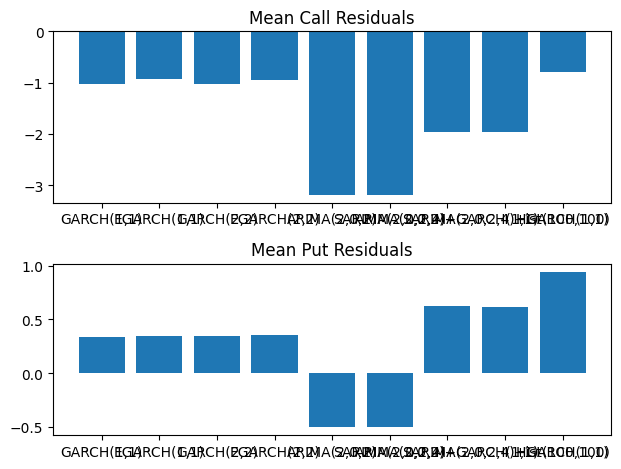

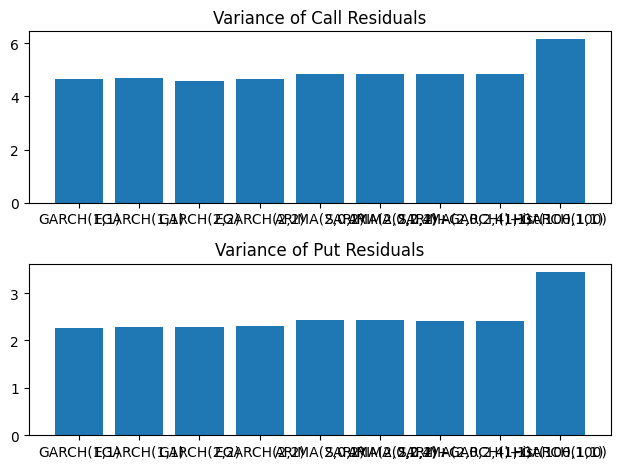

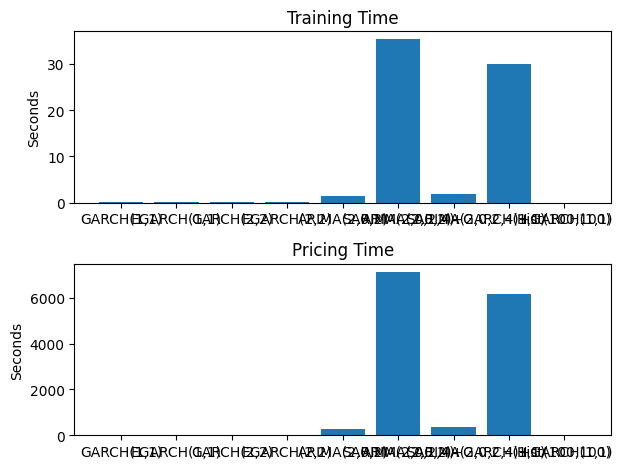

In [19]:
Backtest.compare_performance(models, perfs)